The Dentist Fallacy comes from advertising claims like "90% of dentists recommend our brand of toothpaste". That makes it sound like the dentists are recommending the toothpaste *over other brands of toothpaste*, whereas they're really just being asked to recommend as many brands as they think are good.

To illustrate this, our blobs will have some fruit experts recommend types of fruits. We will track both how often each fruit in general is recommended, as well as how often an expert rates it higher than another type of fruit. We will report the Dentist Fallacy claims "x% of fruit experts recommend our fruit!" as well as the conditional claims "y% of fruit experts prefer apples to bananas".

In [1]:
import random as r
import numpy as np
import matplotlib.pyplot as plt
r.seed(1)

In [2]:
class Fruit:
    def __init__(self, name, approvalThreshold):
        self.name = name
        self.approvalThreshold = approvalThreshold

fruits = [
    Fruit("apples", r.uniform(0, 0.25)),
    Fruit("bananas", r.uniform(0, 0.25)),
    Fruit("cherries", r.uniform(0, 0.25)),
    Fruit("dates", r.uniform(0, 0.25)),
    Fruit("elderberries", r.uniform(0, 0.25)),
    Fruit("figs", r.uniform(0, 0.25)),
    Fruit("guavas", r.uniform(0, 0.25)),
    Fruit("honeydews", r.uniform(0, 0.25))
]

for fruit in fruits:
    print(fruit.name, fruit.approvalThreshold)

apples 0.033591061028100305
bananas 0.21185843423430817
cherries 0.1909436547441535
dates 0.06376725643485542
elderberries 0.12385877177298524
figs 0.11237276619718453
guavas 0.16289824318069074
honeydews 0.1971808377838783


approvalThreshold is the probability a fruit expert does *not* approve of the fruit, so the smaller the number, the more popular the fruit is. If a fruit expert recommends more than one fruit, we'll sort them from "most approved" to "least approved". We decide if the fruit experts approve based on p = r.uniform(0, 1), and their actual approval will be p - approvalThreshold. Notice that all fruits are more likely to be approved than not, since they tend to all be at least okay.

In [3]:
numFruitExperts = 1000
approvalMatrix = []
for i in range(numFruitExperts):
    approvedFruits = []
    for fruit in fruits:
        p = r.uniform(0, 1)
        if p > fruit.approvalThreshold:
            approvedFruits.append([fruit.name, p - fruit.approvalThreshold])
    approvedFruits.sort(key = lambda x: x[1], reverse = True)
    approvalMatrix.append(approvedFruits)

Which percentage of fruit experts recommend each fruit?

In [4]:
totalApprovals = [0 for c in range(len(fruits))]
for approval in approvalMatrix:
    for i in range(len(fruits)):
        for j in range(len(approval)):
            if fruits[i].name == approval[j][0]:
                totalApprovals[i] += 1
print(totalApprovals)

[968, 776, 811, 931, 876, 883, 834, 791]


So what are our dentist fallacy advertising slogans?

In [5]:
for i in range(len(fruits)):
    print(f"{totalApprovals[i] * 100 / numFruitExperts}% of fruit experts recommend {fruits[i].name}!")

96.8% of fruit experts recommend apples!
77.6% of fruit experts recommend bananas!
81.1% of fruit experts recommend cherries!
93.1% of fruit experts recommend dates!
87.6% of fruit experts recommend elderberries!
88.3% of fruit experts recommend figs!
83.4% of fruit experts recommend guavas!
79.1% of fruit experts recommend honeydews!


*83.4% of fruit experts recommend Guavas!* makes it sound like they are the best fruit, when in reality they are below average.

So now let's calculate how often a fruit exprt prefers one fruit to another, to get better recommendations!

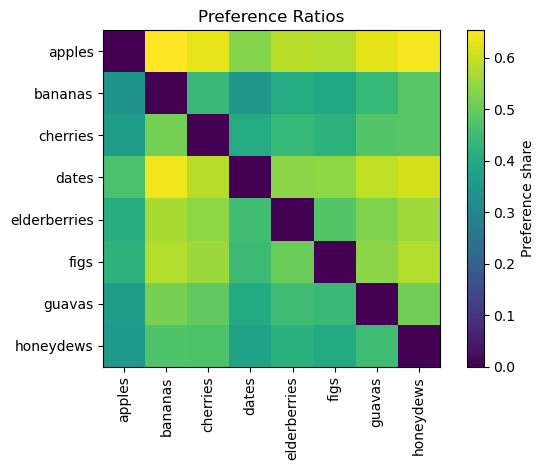

In [6]:
fruitNames = [f.name for f in fruits]
numFruits = len(fruitNames)
nameToIndex = {name: i for i, name in enumerate(fruitNames)}

expertPreferenceMatrices = []
for approvedList in approvalMatrix:
    positionByName = {name: rank for rank, (name, score) in enumerate(approvedList)}
    preferenceMatrix = [[0] * numFruits for _ in range(numFruits)]
    for i, fruitA in enumerate(fruitNames):
        posA = positionByName.get(fruitA)
        for j, fruitB in enumerate(fruitNames):
            if i == j:
                continue
            posB = positionByName.get(fruitB)
            if posA is not None and (posB is None or posA < posB):
                preferenceMatrix[i][j] = 1
    expertPreferenceMatrices.append(preferenceMatrix)

winsMatrix = [[0] * numFruits for _ in range(numFruits)]
for preferenceMatrix in expertPreferenceMatrices:
    for i in range(numFruits):
        for j in range(numFruits):
            winsMatrix[i][j] += preferenceMatrix[i][j]

preferencePercent = [[winsMatrix[i][j] / numFruitExperts for j in range(numFruits)] for i in range(numFruits)]

plt.figure()
plt.imshow(preferencePercent)
plt.xticks(range(numFruits), fruitNames, rotation = 90)
plt.yticks(range(numFruits), fruitNames)
plt.colorbar(label = "Preference share")
plt.title("Preference Ratios")
plt.tight_layout()
plt.show()

Here we see a much better representation of how the fruit experts feel about each fruit. Apples and dates are very popular, while bananas and honeydews are not. Let's also report the actual percentages of expert preferences.

In [7]:
for i in range(len(preferencePercent)):
    for j in range(len(preferencePercent)):
        if i != j:
            print(f"{100 * preferencePercent[i][j]:.1f}% of fruit experts prefer {fruits[i].name} to {fruits[j].name}!")

65.3% of fruit experts prefer apples to bananas!
62.9% of fruit experts prefer apples to cherries!
53.2% of fruit experts prefer apples to dates!
58.2% of fruit experts prefer apples to elderberries!
57.7% of fruit experts prefer apples to figs!
62.7% of fruit experts prefer apples to guavas!
64.5% of fruit experts prefer apples to honeydews!
33.9% of fruit experts prefer bananas to apples!
44.0% of fruit experts prefer bananas to cherries!
34.6% of fruit experts prefer bananas to dates!
40.1% of fruit experts prefer bananas to elderberries!
38.9% of fruit experts prefer bananas to figs!
43.7% of fruit experts prefer bananas to guavas!
48.3% of fruit experts prefer bananas to honeydews!
36.6% of fruit experts prefer cherries to apples!
51.7% of fruit experts prefer cherries to bananas!
40.3% of fruit experts prefer cherries to dates!
43.8% of fruit experts prefer cherries to elderberries!
42.2% of fruit experts prefer cherries to figs!
47.9% of fruit experts prefer cherries to guavas!


These statements give us a much more accurate understanding of the relatui